In [1]:
from my_commonfunctions import *

In [2]:
def get_index_of_max_area_contour(contours):
    i = 0
    i_max = 0
    area_max = 0
    for c in contours:
        area = cv2.contourArea(c)
        if area > area_max:
            area_max = area
            i_max = i
        i += 1

    return i_max

In [8]:
def derotate_and_crop(img_gray):    
    # Derotate
    angle = get_rotation_angle(img_gray)
    gray_rotated = rotate_bound(img_gray, angle)

    # Adaptive thresh & canny
    thresh = cv2.adaptiveThreshold(gray_rotated, 256, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 11)
    thresh = cv2.medianBlur(thresh, 3)
    edges = cv2.Canny(thresh, 100, 200)

    # Distance between staves & staff thickness
    distance_between_staves, staff_thickness = get_distance_between_staves_and_staff_thickness(thresh)
    
    # Musical score mask
    kernel_size = distance_between_staves * 3
    k = np.ones((kernel_size, kernel_size))
    k2 = np.ones((int(kernel_size*1.5), int(kernel_size*1.5)))
    k3 = np.ones((kernel_size*6, kernel_size))
    dilated = cv2.dilate(edges, k)
    dilated_eroded = cv2.erode(dilated, k2)
    dilated_eroded_dilated = cv2.dilate(dilated_eroded, k3)
    
    # Bounding rectangle of the max area contour
    image, contours, hierarchy = cv2.findContours(dilated_eroded_dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    i_max = get_index_of_max_area_contour(contours)
    x, y, w, h = cv2.boundingRect(contours[i_max])
    return gray_rotated[y:y+h, x:x+w], distance_between_staves, staff_thickness

In [11]:
img_gray = my_imread_gray('test_6.jpg')
derotated_croped_gray, distance_between_staves, staff_thickness = derotate_and_crop(img_gray)

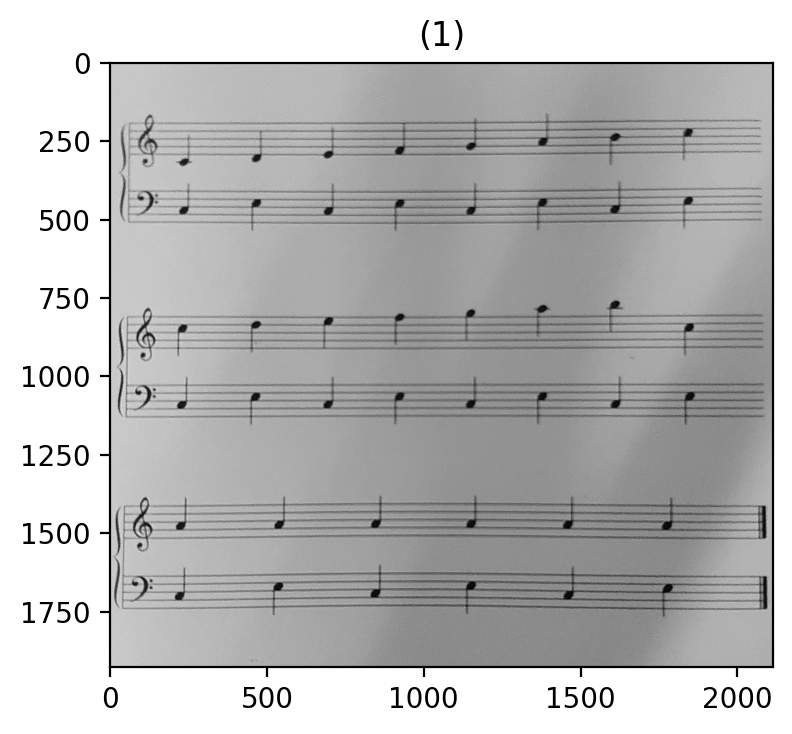

In [12]:
my_show_images([derotated_croped_gray])